#### Drawdown - Ativos


In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
import plotly.express as px


In [78]:
data = pd.read_excel('economatica.xlsx', parse_dates=True, index_col=0, skiprows=3) 

In [79]:
data.replace(to_replace=['-'], value=np.nan, inplace=True)
data.dropna(inplace=True)

In [80]:
def columns(df): #renomeando colunas com as ações
    df.columns = df.columns.str[39:]
columns(data)

In [81]:
### Calculando retornos
retornos = data.pct_change().dropna()*100

In [82]:
eda = ProfileReport(retornos, title='Economatica')


In [83]:
#eda.to_widgets()

In [84]:
### Contando número de colunas
print(len(retornos.columns))
print('\n')
print(retornos.columns)

27


Index(['RRRP3', 'TTEN3', 'AERI3', 'AMBP3', 'BRBI11', 'BBDC4', 'BPAC11',
       'CAML3', 'FESA4', 'GGBR4', 'SOMA3', 'RANI3', 'JBSS3', 'KLBN11', 'LREN3',
       'MELI34', 'MDNE3', 'PETR4', 'PETZ3', 'TUPY3', 'IBOV', 'SMLL',
       'CDI 252 dias', 'DOLOF', 'IMA-B 5', 'IMA-B 5+', 'S&P 500'],
      dtype='object')


In [85]:
drawdown = pd.DataFrame()
for i in data.columns:
    roll = pd.DataFrame()
    roll[i] = data[i].rolling(len(data), min_periods=1).max()
    drawdown[i] = data[i]/roll[i] - 1
drawdown.dropna(inplace=True)

##### Criando graficos de drawdown

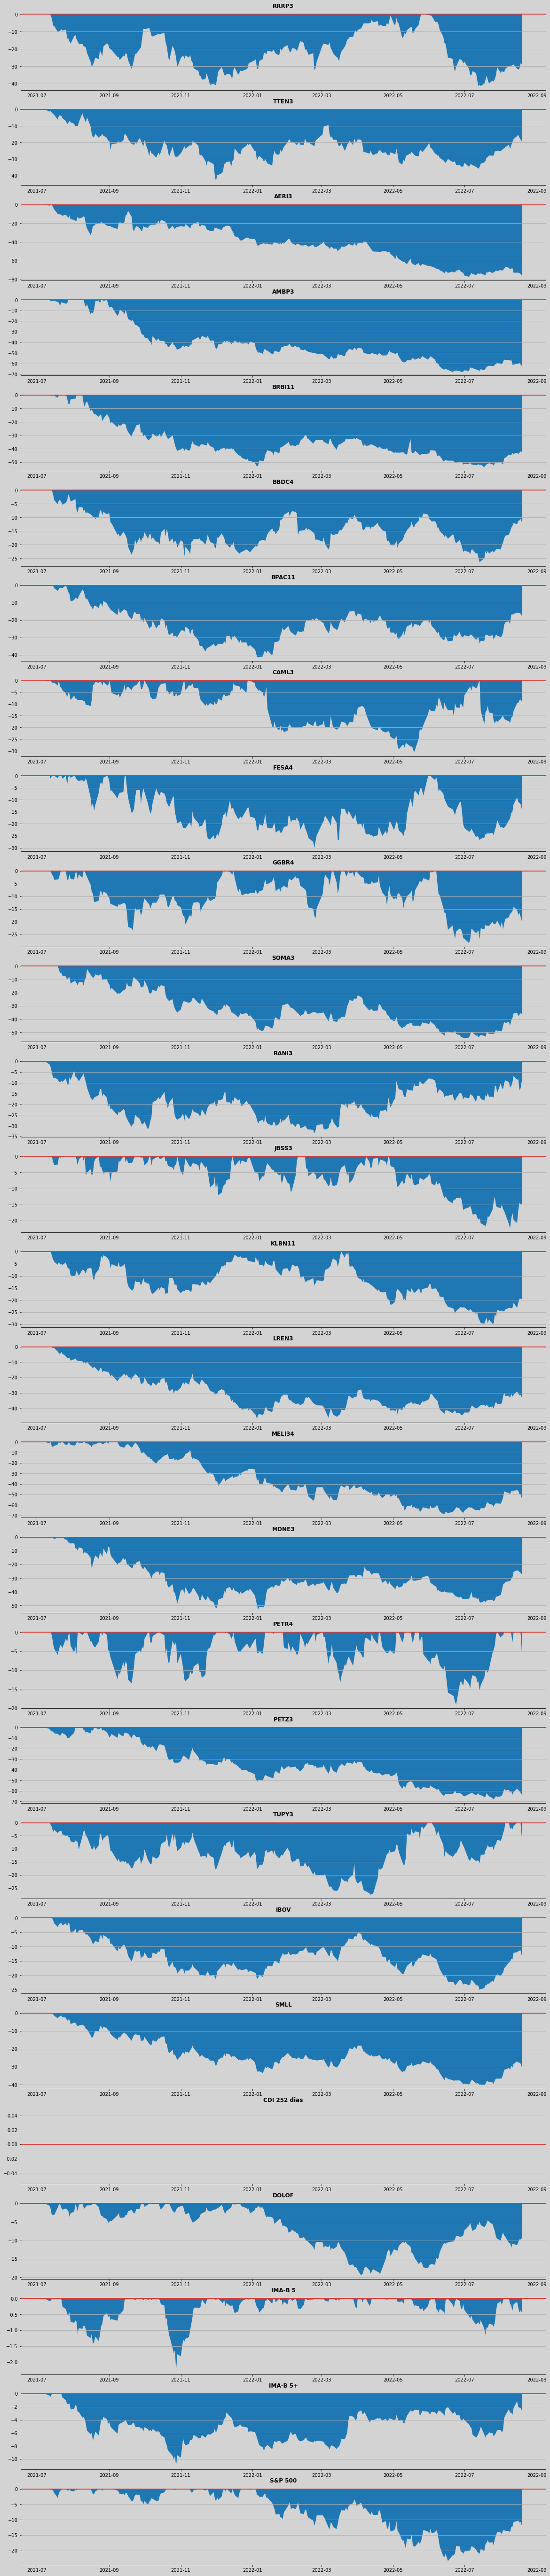

In [86]:
fig, ax = plt.subplots(27, 1, figsize=(20, 100), facecolor='#D3D3D3')
#fig.suptitle('Drawdown', fontsize=30, fontweight="bold")
for i, j in enumerate(data.columns):
    ax[i].set_facecolor('#D3D3D3')
    ax[i].axhline(y=0, color="#e3120b", linewidth=1.5)
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['left'].set_visible(False)
    ax[i].set_title(j, fontweight="bold")
    ax[i].grid(axis='y')
    ax[i].fill_between(drawdown.index, drawdown[j]*100, alpha=1)


In [90]:
#### Calculando desempenho
ativos = pd.DataFrame()
for i in retornos.columns:
    ativos[i] = data[i].div(data[i].iloc[0]).mul(100)
    
ativos.drop(['CDI 252 dias', 'DOLOF'], axis=1, inplace=True)

In [98]:
ativos.reset_index(inplace=True)

In [101]:
fig = px.line(
    data_frame=ativos,
    title='Desempenho da carteira',
    x='Data',
    y=['RRRP3', 'TTEN3', 'AERI3', 'AMBP3', 'BRBI11', 'BBDC4', 'BPAC11',
       'CAML3', 'FESA4', 'GGBR4', 'SOMA3', 'RANI3', 'JBSS3', 'KLBN11', 'LREN3',
       'MELI34', 'MDNE3', 'PETR4', 'PETZ3', 'TUPY3', 'IBOV', 'SMLL',
       'IMA-B 5', 'IMA-B 5+', 'S&P 500'],
    )

fig.update_xaxes( ### criando botões e slicer
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.update_layout(
    autosize=False,
    width=1000,
    height=800,)